<a href="https://colab.research.google.com/github/GojuRyuProgrammer/svm_ham_spam/blob/main/svm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<div style="border-radius:10px; padding: 30px; background-color: #c0e5e9; font-size:90%; text-align:left">
<p style="font-family:Georgia; font-size:400%;font-weight:bold;text-align:center;color:navy;"> E-mail Spam Filtering Via SVM  </p>

<p style="font-family:newtimeroman; font-size:200%;font-weight:bold;text-align:center;color:navy;">Student : Ali Bayrami👨‍💻</p> </div>     

<p style="font-family:newtimeroman; font-size:200%;font-weight:bold;text-align:center;color:navy;"> Supervisor & Tutor: Dr. Nava Eslami </p>

<p style="font-family:newtimeroman; font-size:200%;font-weight:bold;text-align:center;color:navy;"> TA : Mohammad Reza Sheikh </p>
</div>    

<a id="c_table"></a>

<div style="border-radius:10px; padding: 15px; background-color: #c0e5e9; font-size:115%; text-align:left">

<h3 align="left"><font color=navy>Table of Contents:</font></h3>
        
* [1 | Libraries](#lib)
* [2 | Importing Dataset](#data)
* [3 | Dataset Visualization (EDA)](#dataviz)
* [4 | Preprocessing](#preprocessing)
* [5 | Model Training](#svm)

In [1]:
pip install numpy pandas scikit-learn nltk


<a id="lib"></a>
# <p style="background-color:powderblue; font-family:roboto; color:navy; font-size:145%;font-weight:bold; text-align:center; border-radius:25px 10px; padding: 10px">1 - Libraries 📚</p>

⬆️ [Table of Contents](#c_table)

In [26]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import string
import re
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from collections import Counter




In [3]:
nltk.download('stopwords')
nltk.download('wordnet')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

<a id="data"></a>
# <p style="background-color:powderblue; font-family:roboto; color:navy; font-size:145%;font-weight:bold; text-align:center; border-radius:25px 10px; padding: 10px">2 - Importing Dataset🗄</p>

⬆️ [Table of Contents](#c_table)

In [7]:
from google.colab import drive
import pandas as pd


drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [8]:
data = pd.read_csv('/content/drive/My Drive/Colab Notebooks/mail_data.csv')
data.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


<a id="dataviz"></a>
# <p style="background-color:powderblue; font-family:roboto; color:navy; font-size:145%;font-weight:bold; text-align:center; border-radius:25px 10px; padding: 10px">3 - Dataset Visualization (EDA)</p>

⬆️ [Table of Contents](#c_table)

<ipython-input-35-de4b6f5a4e5f>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x='Category',  palette={'ham': 'blue', 'spam': 'red'})


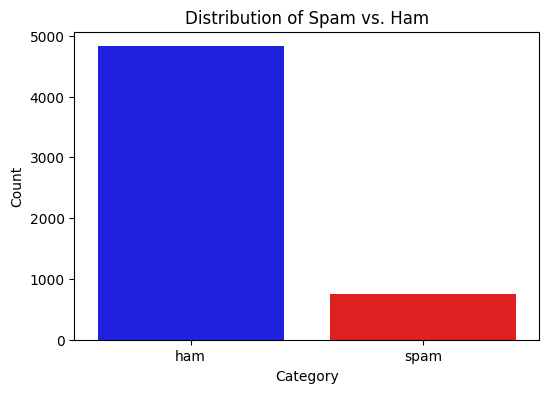

In [35]:
plt.figure(figsize=(6, 4))
sns.countplot(data=data, x='Category',  palette={'ham': 'blue', 'spam': 'red'})
plt.title('Distribution of Spam vs. Ham')
plt.xlabel('Category')
plt.ylabel('Count')
plt.show()

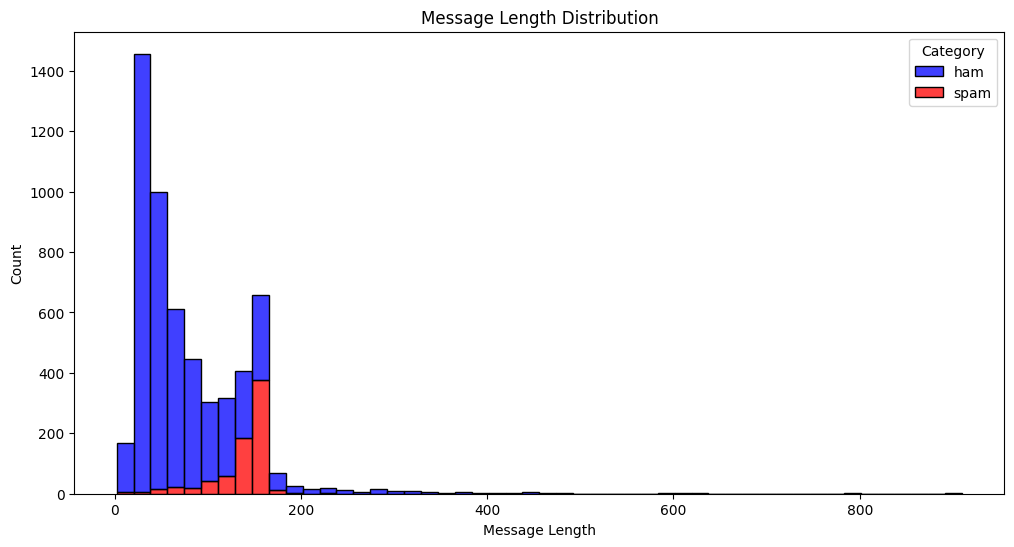

In [34]:
data['Message_Length'] = data['Message'].apply(len)


plt.figure(figsize=(12, 6))
sns.histplot(data=data, x='Message_Length', hue='Category', multiple='stack', bins=50, palette={'ham': 'blue', 'spam': 'red'})
plt.title('Message Length Distribution')
plt.xlabel('Message Length')
plt.ylabel('Count')
plt.show()

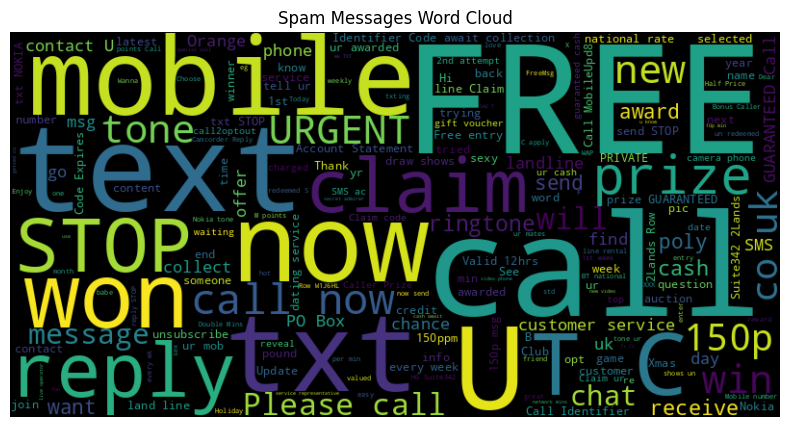

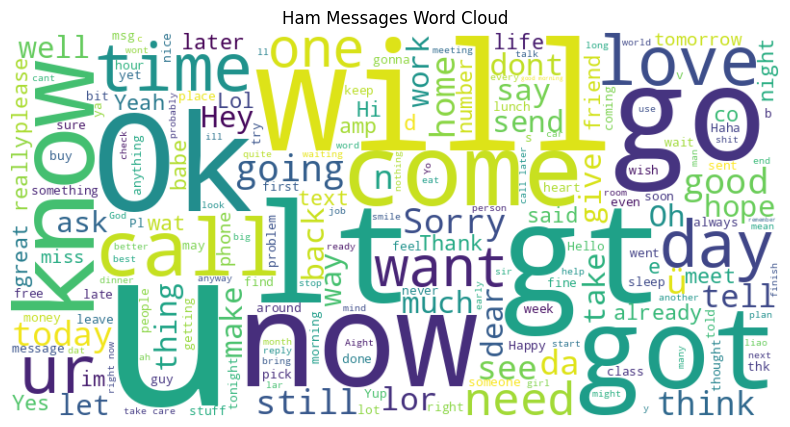

In [22]:
spam_words = ' '.join(data[data['Category'] == 'spam']['Message'])
ham_words = ' '.join(data[data['Category'] == 'ham']['Message'])

spam_wordcloud = WordCloud(width=800, height=400, background_color='black').generate(spam_words)
ham_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(ham_words)


plt.figure(figsize=(10, 5))
plt.imshow(spam_wordcloud, interpolation='bilinear')
plt.title('Spam Messages Word Cloud')
plt.axis('off')
plt.show()

plt.figure(figsize=(10, 5))
plt.imshow(ham_wordcloud, interpolation='bilinear')
plt.title('Ham Messages Word Cloud')
plt.axis('off')
plt.show()

<ipython-input-31-8d9e198adcc1>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=spam_freq_df, x='Frequency', y='Word', palette='Reds_r')


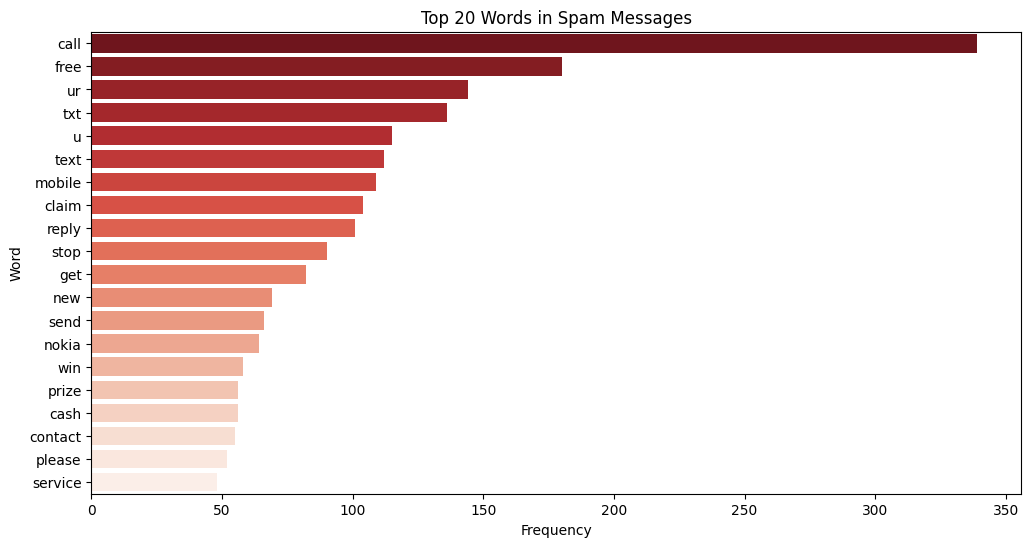

<ipython-input-31-8d9e198adcc1>:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax= sns.barplot(data=ham_freq_df, x='Frequency', y='Word', palette='Blues_r')


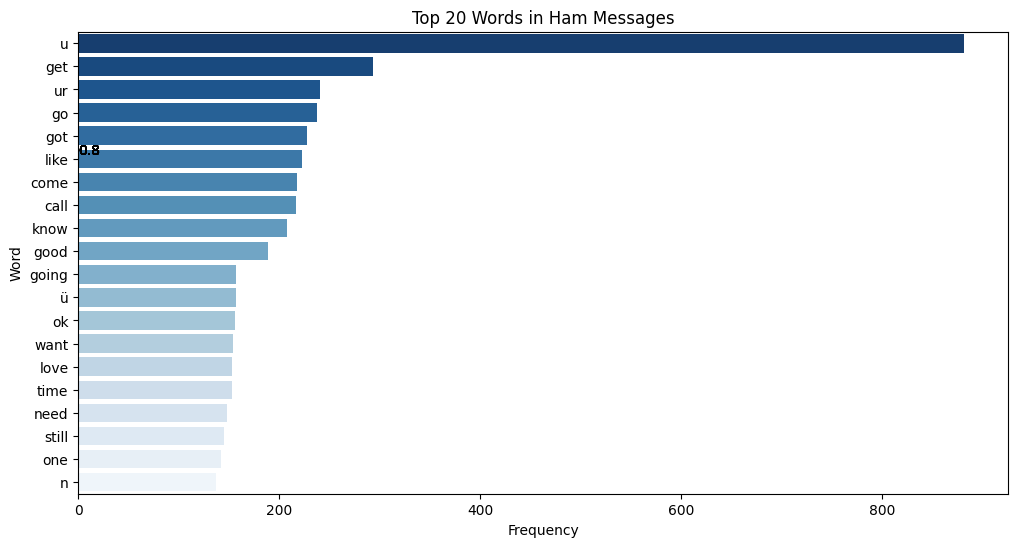

In [31]:


def get_word_freq(messages):
    words = ' '.join(messages).lower().split()
    words = [word for word in words if word not in stop_words and word.isalpha()]
    word_freq = Counter(words)
    return word_freq.most_common(20)

spam_word_freq = get_word_freq(data[data['Category'] == 'spam']['Message'])
ham_word_freq = get_word_freq(data[data['Category'] == 'ham']['Message'])


spam_freq_df = pd.DataFrame(spam_word_freq, columns=['Word', 'Frequency'])
ham_freq_df = pd.DataFrame(ham_word_freq, columns=['Word', 'Frequency'])


plt.figure(figsize=(12, 6))
sns.barplot(data=spam_freq_df, x='Frequency', y='Word', palette='Reds_r')
plt.title('Top 20 Words in Spam Messages')
plt.xlabel('Frequency')
plt.ylabel('Word')
plt.show()

plt.figure(figsize=(12, 6))
sns.barplot(data=ham_freq_df, x='Frequency', y='Word', palette='Blues_r')
plt.title('Top 20 Words in Ham Messages')
plt.xlabel('Frequency')
plt.ylabel('Word')
plt.show()

<a id="preprocessing"></a>
# <p style="background-color:powderblue; font-family:roboto; color:navy; font-size:145%;font-weight:bold; text-align:center; border-radius:25px 10px; padding: 10px">4 - Preprocessing </p>

⬆️ [Table of Contents](#c_table)

In [10]:
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'\d+', '', text)
    text = text.translate(str.maketrans('', '', string.punctuation))
    words = text.split()
    words = [lemmatizer.lemmatize(word) for word in words if word not in stop_words]
    return ' '.join(words)

data['processed_text'] = data['Message'].apply(preprocess_text)
data.head()

,Category,Message,processed_text
0,ham,"Go until jurong point, crazy.. Available only ...",go jurong point crazy available bugis n great ...
1,ham,Ok lar... Joking wif u oni...,ok lar joking wif u oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entry wkly comp win fa cup final tkts st ...
3,ham,U dun say so early hor... U c already then say...,u dun say early hor u c already say
4,ham,"Nah I don't think he goes to usf, he lives aro...",nah dont think go usf life around though


In [12]:
vectorizer = TfidfVectorizer(max_features=3000)
X = vectorizer.fit_transform(data['processed_text']).toarray()
y = data['Category'].map({'ham': 0, 'spam': 1})


<ipython-input-32-9219667562fb>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=tfidf_df, x='Score', y='Feature', palette='rainbow')


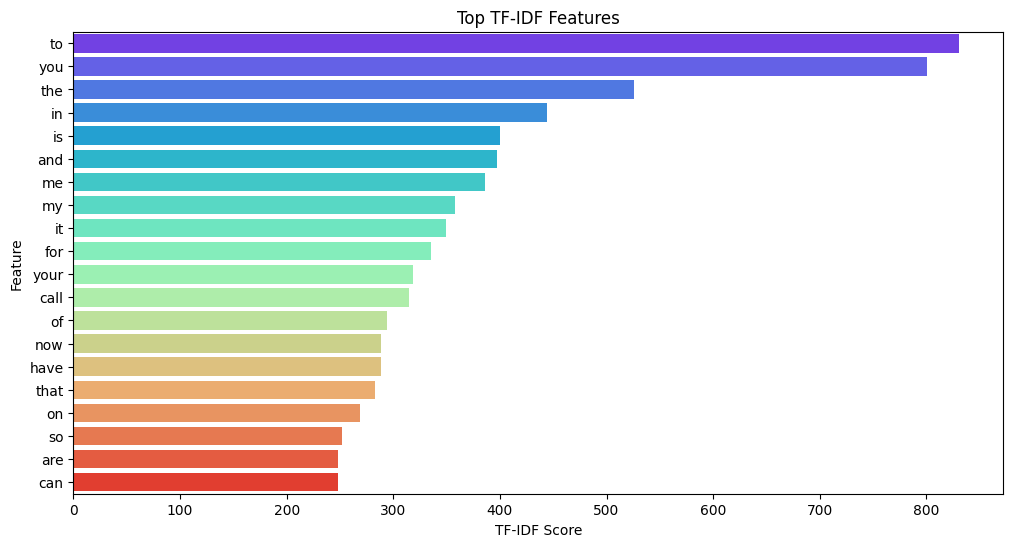

In [32]:
vectorizer = TfidfVectorizer(max_features=20)
X = vectorizer.fit_transform(data['Message']).toarray()
feature_names = vectorizer.get_feature_names_out()


tfidf_scores = np.sum(X, axis=0)


tfidf_df = pd.DataFrame({'Feature': feature_names, 'Score': tfidf_scores})
tfidf_df = tfidf_df.sort_values(by='Score', ascending=False)


plt.figure(figsize=(12, 6))
sns.barplot(data=tfidf_df, x='Score', y='Feature', palette='rainbow')
plt.title('Top TF-IDF Features')
plt.xlabel('TF-IDF Score')
plt.ylabel('Feature')
plt.show()

<a id="svm"></a>
# <p style="background-color:powderblue; font-family:roboto; color:navy; font-size:145%;font-weight:bold; text-align:center; border-radius:25px 10px; padding: 10px">5 - Model Training </p>

⬆️ [Table of Contents](#c_table)

In [13]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:
model = SVC(kernel='linear', C=1.0, random_state=42)
model.fit(X_train, y_train)


y_pred = model.predict(X_test)


In [15]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.9847533632286996
Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       966
           1       0.99      0.89      0.94       149

    accuracy                           0.98      1115
   macro avg       0.99      0.95      0.97      1115
weighted avg       0.98      0.98      0.98      1115



In [17]:
from sklearn.metrics import confusion_matrix
confusion_m = confusion_matrix(y_test, y_pred)
confusion_m

array([[965,   1],
       [ 16, 133]])

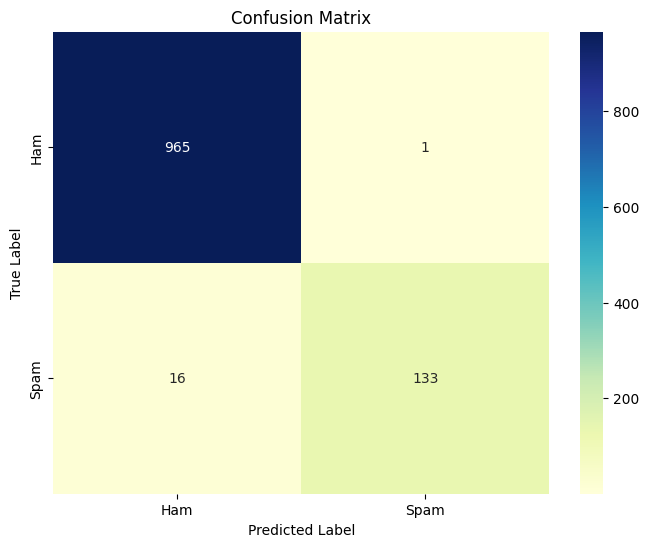

In [37]:
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_m, annot=True, fmt='d', cmap='YlGnBu', xticklabels=['Ham', 'Spam'], yticklabels=['Ham', 'Spam'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

<font style="font-family:'Times New Roman', serif; font-size:300%;font-weight:bold;color:magenta;"> Best Regards!</font><br>